<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div> 

# Some nomenclature

The difference between a figure and an axis: 
- A figure is the full canvas used to draw stuff on. 
- An axis is the individual aces used for plotting.

The following example has 4 axes on a single canvas.
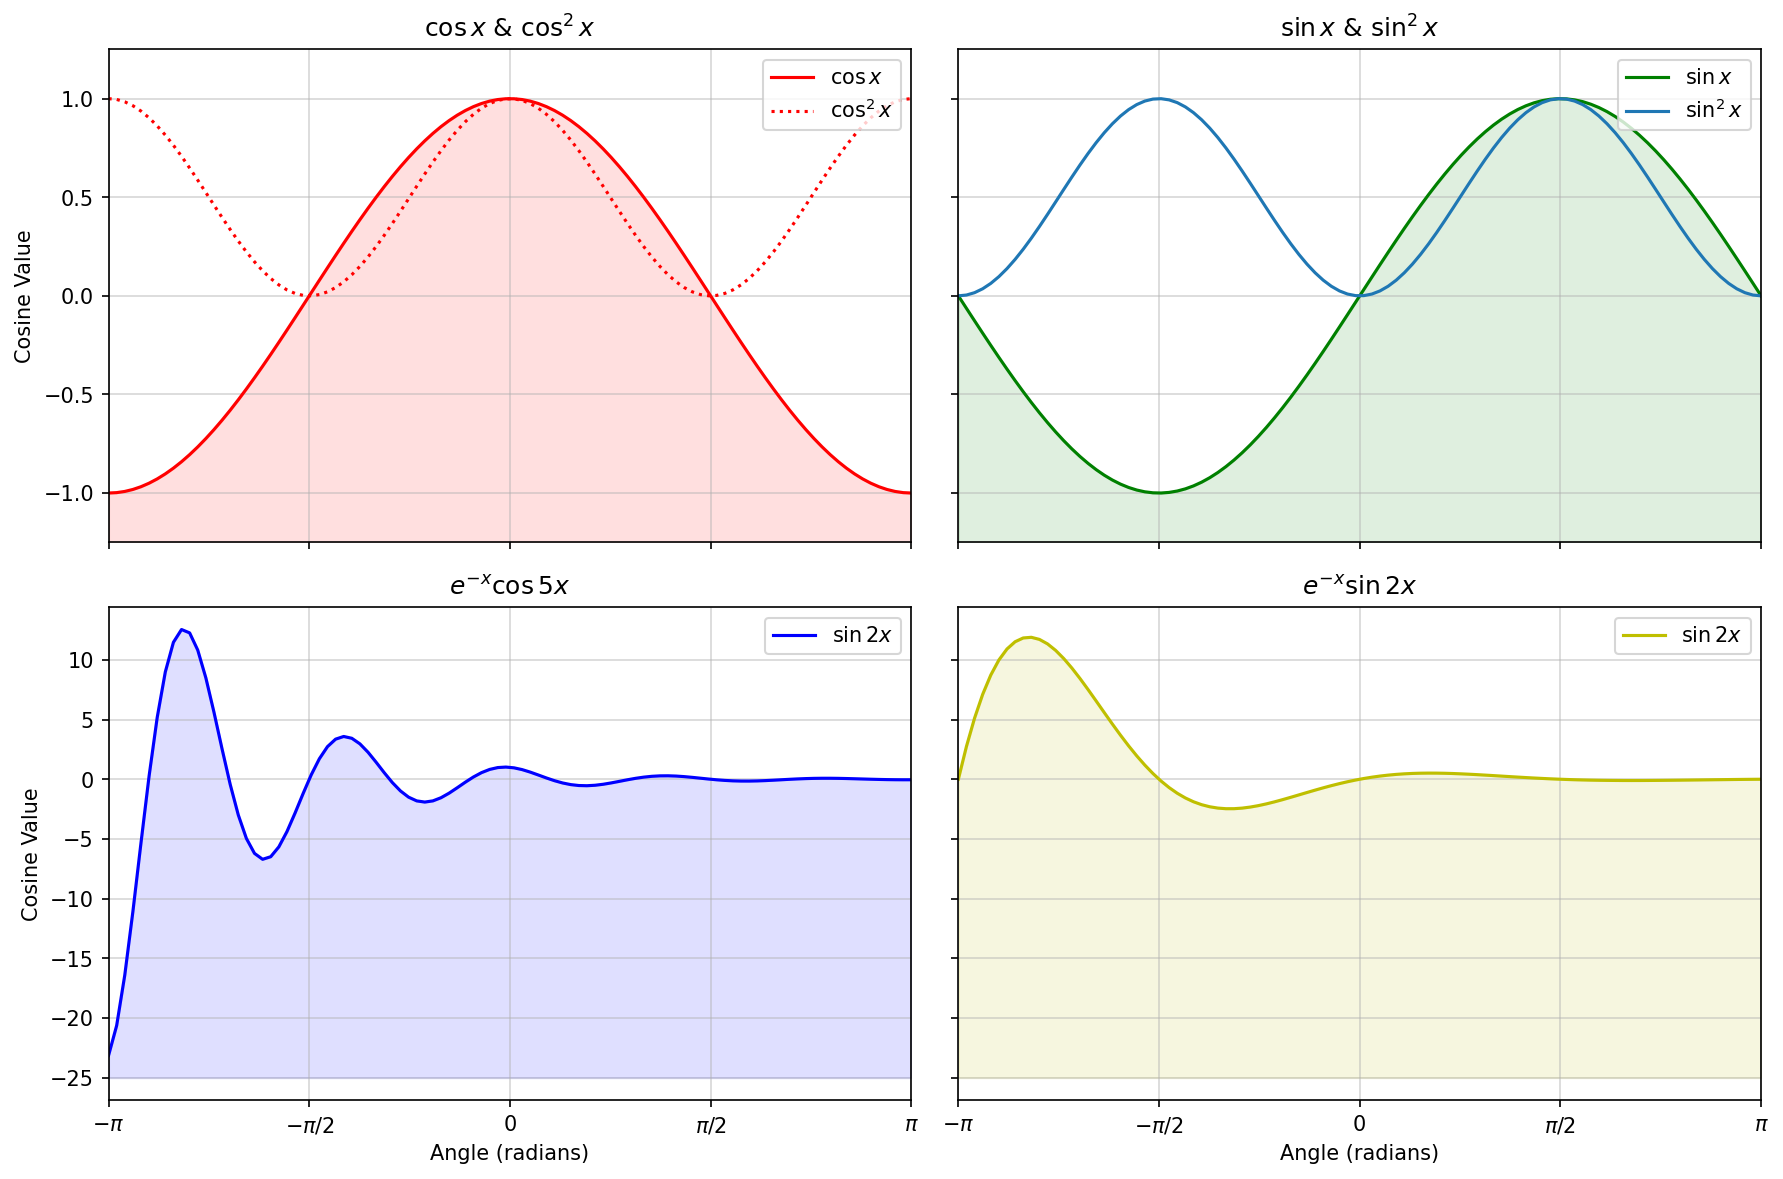

# Comparing the two ‘dialects’

In [3]:
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### pyplot Interface

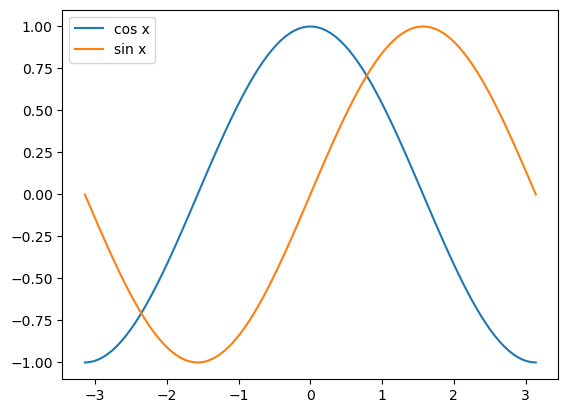

In [4]:
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()

### OO Interface

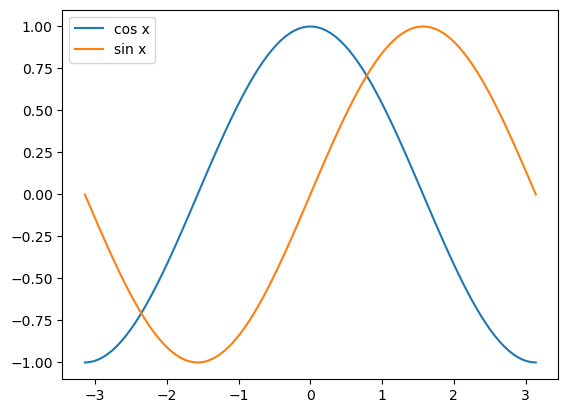

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1) #subplots to create a figure and an axis. Fig and ax are just conventional names. 
ax.plot(x, cos_x, label ='cos x')
ax.plot(x, sin_x, label ='sin x')
ax.legend()


# What is OO ax, really?

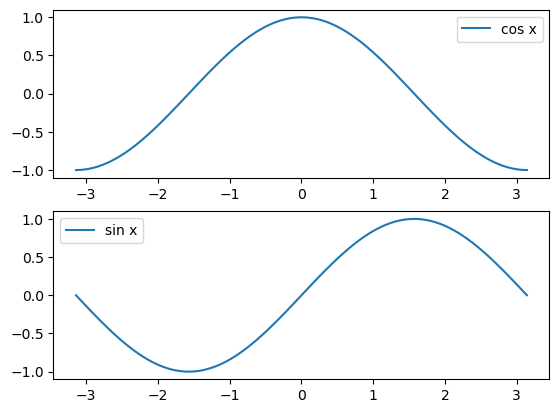

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

In [8]:
type(ax)

numpy.ndarray

In [10]:
ax.shape #size

(2,)

In [12]:
type(ax[0]) #what is inside ax? The below is a Matplotlib axis. 

matplotlib.axes._axes.Axes

# A complete OO example

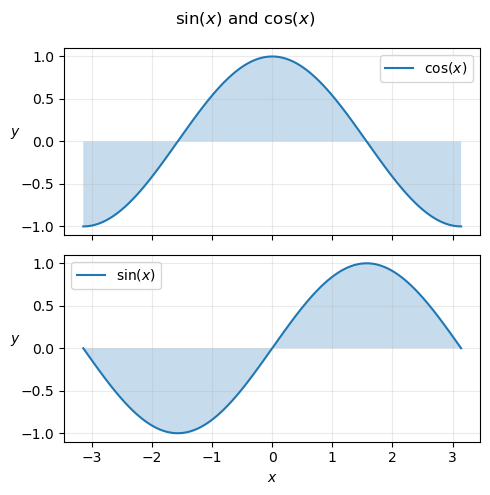

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5), #changes the size of the figure by specifying a figure size. 
                       sharex=True) # asking the plots to share the x-axis using sharex
ax[0].plot(x, cos_x, label=r'$\cos(x)$') #ax is a numpy array with 2 axes, thus index them using 0 and 1. plot to that axis 
ax[0].fill_between(x, 0, cos_x, alpha=.25) #fill between the plots 
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:  
    a.legend() #how is the legend at different places?
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$') #shared x axis, thus only need to label the lowest point which has the index 1. 

fig.suptitle(r'$\sin(x)$ and $\cos(x)$') #adding a supertitle to the figure not plot. 
fig.tight_layout() #Matplotlib uses to this polish things. 

# Multiple rows and columns

### Using ax

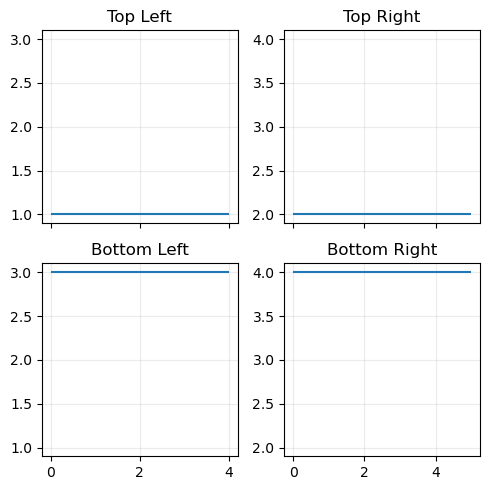

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

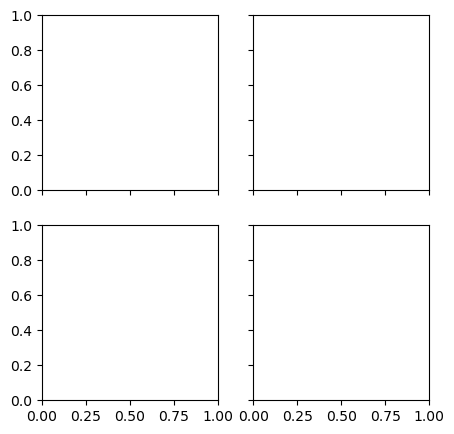

In [17]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, #There are 4 axes. 
                      figsize = (5, 5), 
                      sharex = 'col', sharey = 'row')

In [18]:
ax.shape

(2, 2)

In [19]:
#To access each of the axes:
ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

Text(0.5, 1.0, 'Bottom Right')

In [20]:
#To tweak each axis separately:
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

In [22]:
#The following can also be used: 
top_left, top_right, bottom_left, bottom_right = ax.flatten() #flatten takes 2D arrays and flattens it into a 1D array

In [23]:
#How the lines were drawn: 
top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

## Sharing axes

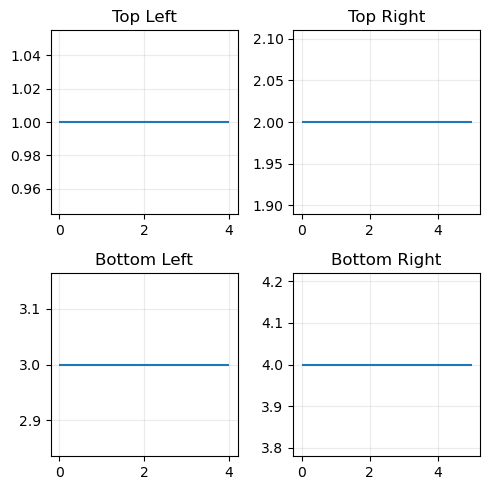

In [27]:
# When how to share is not instructed: 
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5)
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

Matplotlib has auto-scaled both scales. 

| Option | Result |
| :--- | :--- |
| True | Makes all the axes use the same range |
| col | Uses the same range for all the columns |
| row | Uses the same range for all the rows |

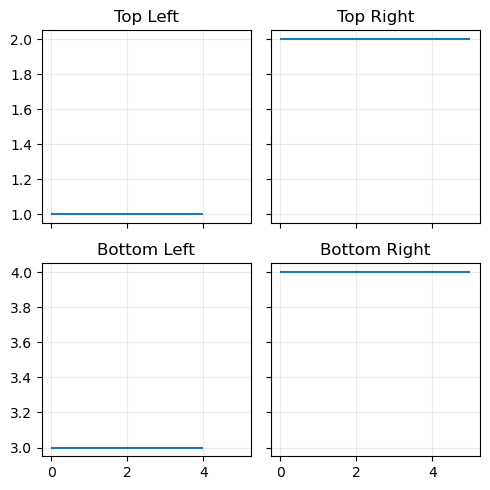

In [29]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

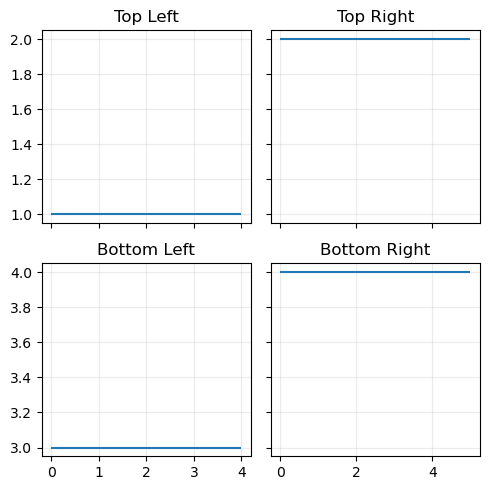

In [30]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

## Accessing all axes

In [33]:
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

for a in ax.flatten():
    a.grid(alpha=.25)

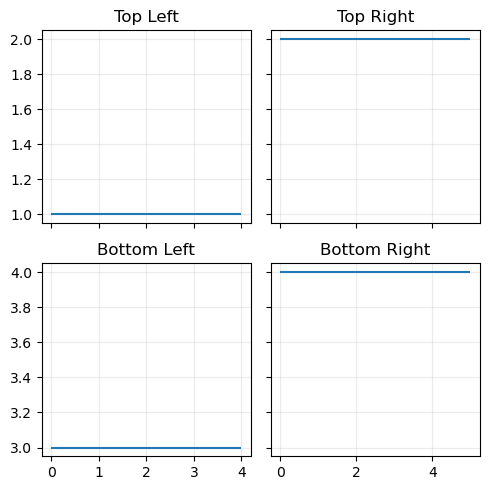

In [34]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

# Other useful plots

## Histograms

### Data & A quick helper function

In [38]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1) #the first row is the name not the value. 

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

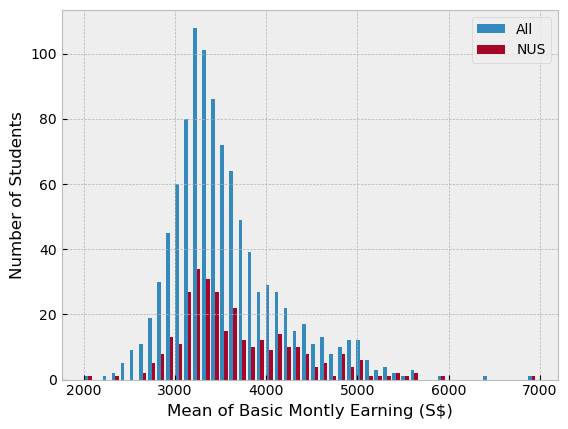

In [39]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1) #the first row is the name not the value. 

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## Scatter plots

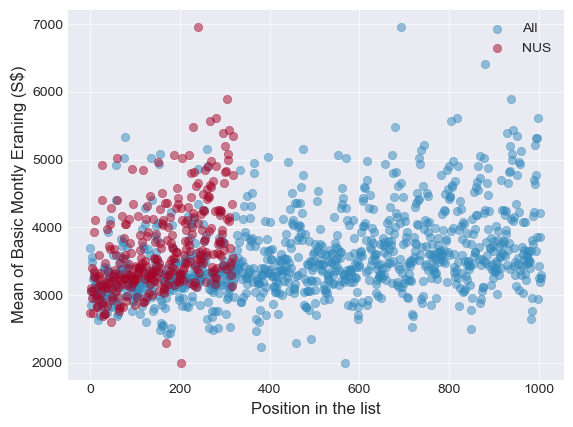

In [40]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## Bar charts

Text(0, 0.5, 'Number of Students')

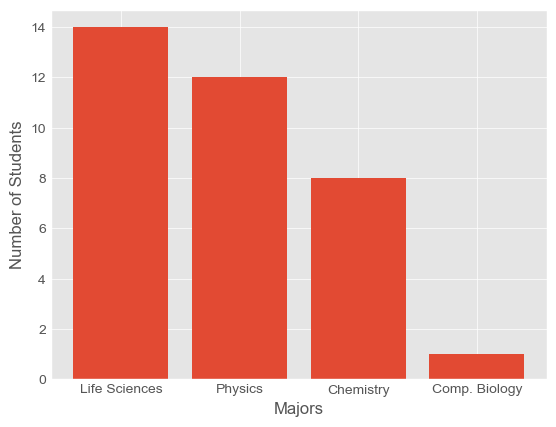

In [41]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers) #barh if horizontal is needed
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## Pie charts

Text(0.5, 1.0, 'Percentage of each major')

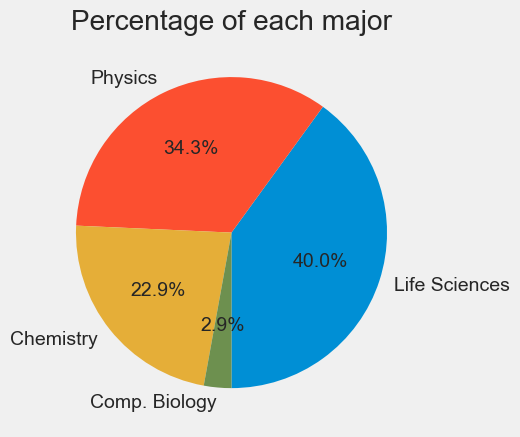

In [42]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')